In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
all = pd.read_csv("case_comp.csv")
games = pd.read_csv("vgsales.csv")
sales_year = games.groupby("Year").sum().reset_index().iloc[:,[0,2,3,4,5,6]]
publisher_year = games.groupby(["Year","Publisher"]).sum().reset_index()

publisher_year.head()

,Year,Publisher,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,Activision,20153,2.82,0.18,0.0,0.03,3.02
1,1980.0,Atari,9673,7.77,0.49,0.0,0.09,8.36
2,1981.0,20th Century Fox Video Games,15139,1.27,0.07,0.0,0.01,1.35
3,1981.0,Activision,16815,7.95,0.46,0.0,0.08,8.50
4,1981.0,Atari,47318,7.87,0.47,0.0,0.08,8.45


In [72]:
publisher_year = games.groupby(["Year","Publisher"]).sum().reset_index()

platform_year = games.groupby(['Year','Platform']).sum().reset_index()

top_pubs = publisher_year.groupby('Publisher').sum().reset_index().iloc[:,[0,7]].sort_values("Global_Sales", ascending= False).iloc[:10]['Publisher'].to_list()

top_plats = platform_year.groupby('Platform').sum().reset_index().iloc[:,[0,7]].sort_values("Global_Sales", ascending= False).iloc[:10]['Platform'].to_list()

In [27]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

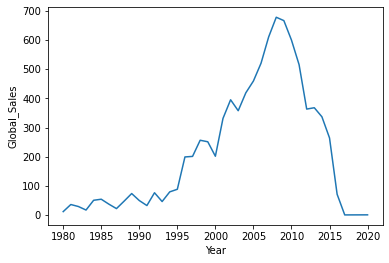

In [13]:
sns.lineplot(data= sales_year, x = 'Year', y = 'Global_Sales')

<AxesSubplot:xlabel='Year', ylabel='NA_Sales'>

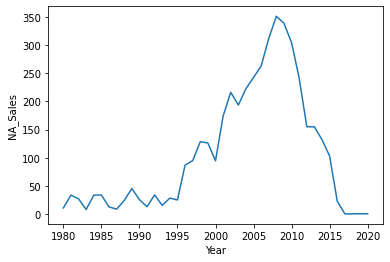

In [14]:
sns.lineplot(data= sales_year, x = 'Year', y = 'NA_Sales')

In [ ]:
sns.lineplot(data= sales_year, x = 'Year', y = 'JP_Sales')

In [ ]:
sns.lineplot(data= publisher_year[publisher_year['Publisher'].isin(top_pubs)], x = 'Year', y = 'Global_Sales', hue = 'Publisher')

In [70]:
platform_year

,Year,Platform,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,2600,29826,10.59,0.67,0.00,0.12,11.38
1,1981.0,2600,190488,33.40,1.96,0.00,0.32,35.77
2,1982.0,2600,149186,26.92,1.65,0.00,0.31,28.86
3,1983.0,2600,49355,5.44,0.34,0.00,0.06,5.83
4,1983.0,NES,7404,2.32,0.46,8.10,0.08,10.96
...,...,...,...,...,...,...,...,...
236,2016.0,X360,93657,0.36,0.40,0.00,0.07,0.83
237,2016.0,XOne,584548,6.69,4.63,0.01,1.05,12.37
238,2017.0,PS4,14393,0.00,0.00,0.03,0.00,0.03
239,2017.0,PSV,32685,0.00,0.00,0.02,0.00,0.02


In [73]:
top_plats

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC']

In [74]:
platform_year[platform_year['Platform'].isin(top_plats)]

,Year,Platform,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8,1985.0,DS,15870,0.00,0.00,0.02,0.00,0.02
10,1985.0,PC,14338,0.00,0.03,0.00,0.01,0.03
18,1988.0,PC,14510,0.00,0.02,0.00,0.01,0.03
34,1992.0,PC,46608,1.24,1.66,0.00,0.11,3.02
46,1994.0,PC,19217,5.55,6.85,0.00,0.46,12.85
...,...,...,...,...,...,...,...,...
232,2016.0,PS3,393791,0.40,0.80,1.13,0.22,2.59
233,2016.0,PS4,1079248,11.86,17.48,4.23,5.73,39.25
236,2016.0,X360,93657,0.36,0.40,0.00,0.07,0.83
238,2017.0,PS4,14393,0.00,0.00,0.03,0.00,0.03


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

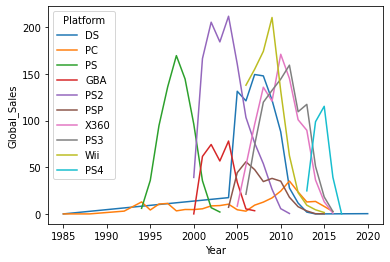

In [75]:
sns.lineplot(data= platform_year[platform_year['Platform'].isin(top_plats)], x = 'Year', y = 'Global_Sales', hue = 'Platform')